# Springboard take home challange section 20.1 

## Ultimate Inc. Data Analysis Challenge

In this notebook, I will attempt at solving all three parts of the Ultimate Inc. Data Analysis Challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).


## Part 1: Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location.

1. Aggregate these login counts based on 15minute time intervals, and visualize 
2. describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
3. Report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

##### Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import json

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in the data
filename = 'logins.json'
logins_df = pd.read_json(filename)
logins_df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
# Resample teh timestamp data from dataframe in 15 minute time intervals
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_df = logins_df.resample('15T').sum().fillna(0)

# replace NA as zero
logins_df.fillna(0)
logins_df.head(10)


,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


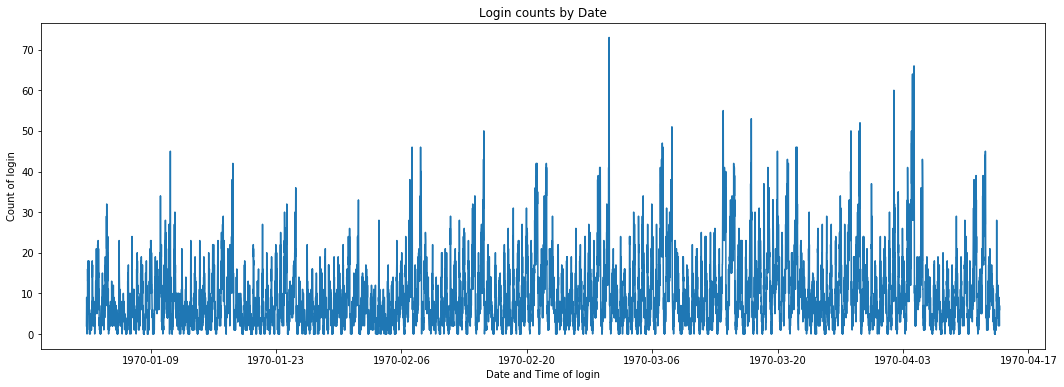

In [4]:
# Show the entire series
plt.figure(figsize=(18,6))

plt.plot(logins_df)
_ = plt.xlabel('Date and Time of login')
_ = plt.ylabel('Count of login')
_ = plt.title('Login counts by Date')

plt.show()

We see here that we have some series overplotting, but that there are clear areas where there are trends. This is characterized by a darker line on the plot. What we can do now is split the data by month and see if we can more easily find trends.

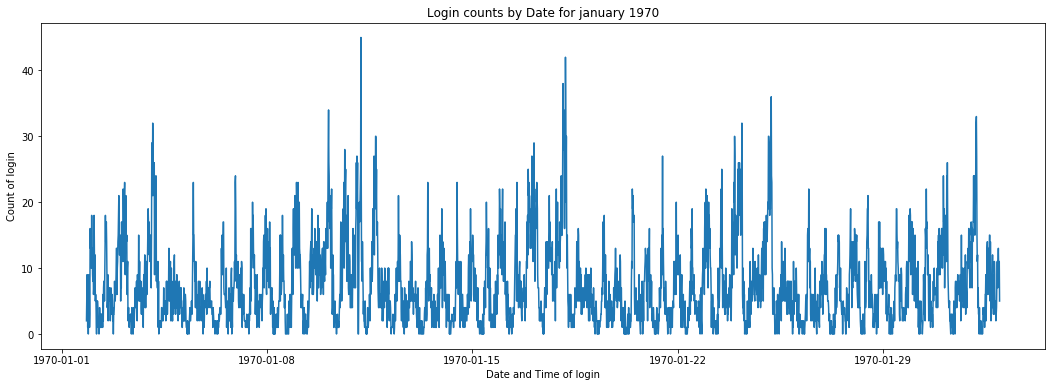

In [5]:
# Plot only of the first month (january) of time series data

plt.figure(figsize=(18,6))

plt.plot(logins_df['1970-01-01': '1970-02-01'])
_ = plt.xlabel('Date and Time of login')
_ = plt.ylabel('Count of login')
_ = plt.title('Login counts by Date for january 1970')


We still see a bit of overplotting, so let's dig deeper. Interestingly, it looks like there is an increasing trend over the week in addition to weekly cycles. For each month, let's split the data into each day of the week and aggregate from there.

In [6]:
# Re-read in the data 

days = list(calendar.day_abbr)
months = list(calendar.month_abbr)

logins_df = pd.read_json(filename)

logins_df['month'] = logins_df['login_time'].apply(lambda x: months[x.month])
logins_df['day'] = logins_df['login_time'].apply(lambda x: days[x.dayofweek])
logins_df['hour'] = logins_df['login_time'].apply(lambda x: x.hour)
logins_df['time'] = logins_df['login_time'].apply(lambda x: x.time())

logins_df = logins_df.set_index('login_time')
print(logins_df.head())

                    month  day  hour      time
login_time                                    
1970-01-01 20:13:18   Jan  Thu    20  20:13:18
1970-01-01 20:16:10   Jan  Thu    20  20:16:10
1970-01-01 20:16:37   Jan  Thu    20  20:16:37
1970-01-01 20:16:36   Jan  Thu    20  20:16:36
1970-01-01 20:26:21   Jan  Thu    20  20:26:21


In [7]:

df = pd.read_json(filename)
df['count'] = 1
df = df.set_index('login_time')
l_df = df.groupby(pd.Grouper(freq='15Min')).aggregate(np.sum) 

l_df['count'] = l_df['count'].fillna(0)
l_df['timestamp'] = pd.to_datetime(l_df.index)

l_df['month'] = l_df['timestamp'].apply(lambda x: months[x.month])
l_df['day'] = l_df['timestamp'].apply(lambda x: days[x.weekday()])
l_df['hour'] = l_df['timestamp'].apply(lambda x: x.hour)
l_df['time'] = l_df['timestamp'].apply(lambda x: x.time())

print(l_df.head())

                     count           timestamp month  day  hour      time
login_time                                                               
1970-01-01 20:00:00    2.0 1970-01-01 20:00:00   Jan  Thu    20  20:00:00
1970-01-01 20:15:00    6.0 1970-01-01 20:15:00   Jan  Thu    20  20:15:00
1970-01-01 20:30:00    9.0 1970-01-01 20:30:00   Jan  Thu    20  20:30:00
1970-01-01 20:45:00    7.0 1970-01-01 20:45:00   Jan  Thu    20  20:45:00
1970-01-01 21:00:00    1.0 1970-01-01 21:00:00   Jan  Thu    21  21:00:00


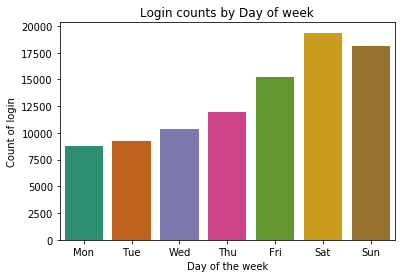

In [8]:
day_counts = l_df.groupby('day')['count'].sum()
sns.barplot(x=day_counts.index, y=day_counts, order=days, palette = 'Dark2')
_ = plt.xlabel('Day of the week')
_ = plt.ylabel('Count of login')
_ = plt.title('Login counts by Day of week')

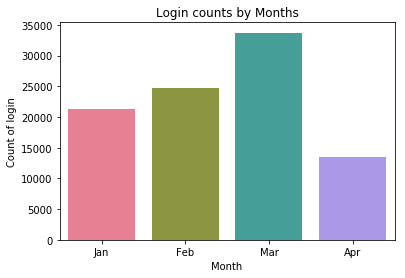

In [9]:
month_counts = l_df.groupby('month')['count'].sum()
sns.barplot(x=month_counts.index, y=month_counts, order=['Jan', 'Feb', 'Mar', 'Apr'], palette = 'husl')
_ = plt.xlabel('Month')
_ = plt.ylabel('Count of login')
_ = plt.title('Login counts by Months')

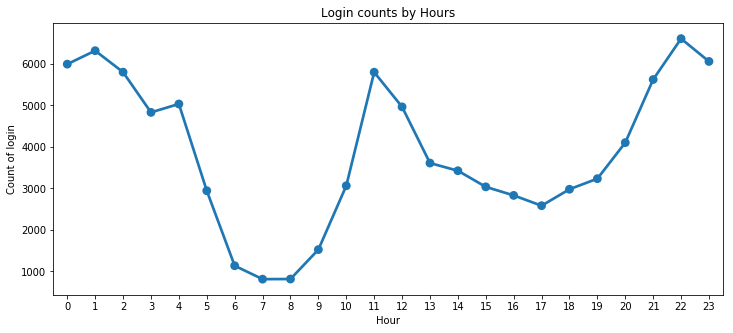

In [10]:
hour_counts = l_df.groupby('hour')['count'].sum()
plt.figure(figsize=(12,5))
sns.pointplot(x=hour_counts.index, y=hour_counts)
_ = plt.xlabel('Hour')
_ = plt.ylabel('Count of login')
_ = plt.title('Login counts by Hours')

**Observation: login counts are recorded from 1st January, 1970 to 13th April, 1970. It is clear that the number of logins has increased over the months (April had just 13 days of activity recorded). This indicates an increasing user base.

In [11]:
# Split by month into new dataframes

jan_df = logins_df['1970-01-01': '1970-01-31']
jan_df.reset_index(drop=False, inplace=True)

feb_df = logins_df['1970-02-01': '1970-02-28']
feb_df.reset_index(drop=False, inplace=True)

mar_df = logins_df['1970-03-01': '1970-03-31']
mar_df.reset_index(drop=False, inplace=True)

apr_df = logins_df['1970-04-01': '1970-04-30']
apr_df.reset_index(drop=False, inplace=True)

# Show example
print('Jan df shape',jan_df.shape )
print('Feb df shape',feb_df.shape )
print('Mar df shape',mar_df.shape )
print('Apr df shape',apr_df.shape )


Jan df shape (21239, 5)
Feb df shape (24673, 5)
Mar df shape (33723, 5)
Apr df shape (13507, 5)


The graph above shows us the amount of activity recorded every hour of the day.

Observations
The platform records maximum activity between 10 PM and 1 AM.
There is also a sharp rise in user activity at around noon.
The least activity is recorded during early morning between 6 AM and 8 AM.

To see this even more clearly, let's isolate the weekends. Below weekends are in red whereas weekdays are in blue:

# Part 2: Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.  
  
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.  
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:  
 + how you will implement the experiment.
 + what statistical test(s) you will conduct to verify the significance of the observation. 
 + how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Note: I'm assuming the demand is equal in both the cities. 

We know that the demand in both the cities is complementary in the weekdays; i.e the demand for both cities can be met by the same driver partners as they are at different times. Therefore, if this experiment was indeed sucessful, it would indicate that the drivers, irrespective of which city they belong to, are spending equal amounts of time in Gotham and Metropolis during the weekdays; Metropolis during the day and Gotham during the night.

The success metric I propose is the ratio of passengers taken from Gotham and Metropolis on weekdays. After the introduction of this experiment, if the ratio has regressed towards 1:1, it would mean that the experiment was successful.

### Solution:

With regard to the key measure of success, We know that the demand in both the cities is complementary in the weekdays; i.e the demand for both cities can be met by the same driver partners as they are at different times. 

I would choose a metric that describes the percentage of time a driver spends in either city. At this point, since the drivers tend to be exclusive to both cities, the metric for the average Gotham driver would look something like 100% time in Gotham and 0% time in Metropolis. In a perfectly successful experiment, we would see the metric shift closer to 50% time in Gotham and 50% time in Metropolis. 

If the metric for the average Gotham driver flips to favor time in Metropolis, there is something wrong and we have incentivized time in Metropolis too much and we may see the average Metropolis driver stay in Metropolis and vice versa. Using a metric such as this one allows us to track real activity in the drivers of both cities and the maximization of such a metric results in a balance of time in both cities.

* **Track the activity of every driver in each city. If the number of Gotham passengers for a particular driver is more, label him/her as a Gotham Driver. Else label as Metropolis Driver.

This will be treated as supervised learning problem. decision tree classification with cross validation and tuning it by feature selection. we can interpret the perfomace of model by MSE and accuracy.

We can interpret the results in the form of a confidence interval. To be safe, a 95% confidence interval could be useful. In this way, we can present our findings such as: We are 95% confident that the mean percent of time the average Gotham driver spends driving in Gotham has dropped to 75% give or take 5%. In this way we can easily show whether the test worked and whether drivers from each city are spending more time outside of their native cities. Two caveats, as described when exploring metrics, might be that:

Results will be taken for a A/B testing where a random sample of driver can be picked to implement the proposed solution and measure the performance by monitoring their trip both ways between cities. and use this as a test sampel in the optimized model and see if the precition and test A/B results are in line.



# Part 3: Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.  
  
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.  
  
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.  
  
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

# Data description
● city: city this user signed up in  
● phone: primary device for this user  
● signup_date: date of account registration; in the form ‘YYYY MM DD’  
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’  
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup  
● avg_rating_by_driver: the rider’s average rating over all of their trips  
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips  
● surge_pct: the percent of trips taken with surge multiplier > 1  
● avg_surge: The average surge multiplier over all of this user’s trips  
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up  
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise  
● weekday_pct: the percent of the user’s trips occurring during a weekday

## Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice).

In [12]:
# Read the data from json ultimate_data_challenge.json

file=open('ultimate_data_challenge.json', 'r')

file_content=file.read()

file.close()

data=json.loads(file_content)

df=pd.DataFrame(data)

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [13]:
# info method will explian if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
# We should convert Date field  to proper datetime format

df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


We read in the data and inspected it. We see that while the numerical features take values we might expect (percents are between 0 and 100, for example), there are a few features that are missing values. Let's take a closer look:

In [15]:
# Look closer at missing values - how many exactly?

for column in list(df.columns):
    num_missing = len(df[df[column].isnull()])
    if num_missing != 0:
        print('There are {} missing values in {}'.format(num_missing, column))

There are 201 missing values in avg_rating_by_driver
There are 8122 missing values in avg_rating_of_driver
There are 396 missing values in phone


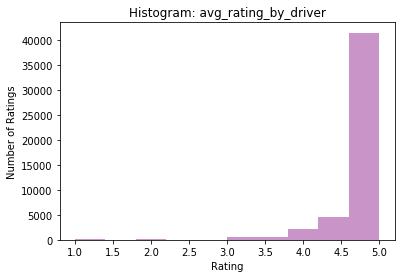

In [16]:
# Let's look at the distribution of values for avg_rating_by_driver

plt.hist(df[np.logical_not(df['avg_rating_by_driver'].isnull())]['avg_rating_by_driver'], color = '#c994c7')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Number of Ratings')
_ = plt.title('Histogram: avg_rating_by_driver')
plt.show;

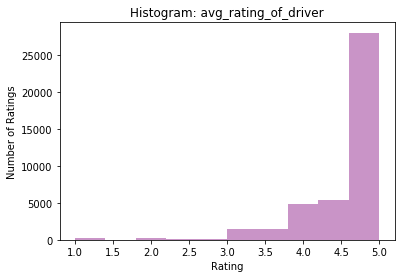

In [17]:
# Let's look at the distribution of values for avg_rating_of_driver

plt.hist(df[np.logical_not(df['avg_rating_of_driver'].isnull())]['avg_rating_of_driver'], color = '#c994c7')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Number of Ratings')
_ = plt.title('Histogram: avg_rating_of_driver')
plt.show;

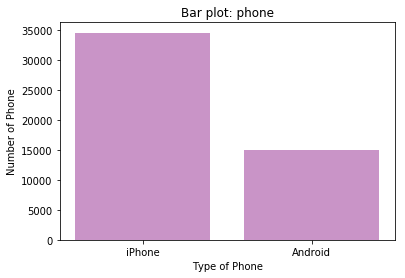

In [18]:
# Let's look at the distribution of values for type of phone

plt.bar([1,2], df[np.logical_not(df['phone'].isnull())]['phone'].value_counts(), align='center',  color = '#c994c7')
plt.xticks([1,2], ['iPhone', 'Android'])
_ = plt.xlabel('Type of Phone')
_ = plt.ylabel('Number of Phone')
_ = plt.title('Bar plot: phone')
plt.show;

We visualize with a histogram that they are highly skewed, we will fill in the missing values using the mean so that we can preserve it because the first two features are numerical in nature. 

The third feature is categorical and is more weighted toward 'iPhone', and so we will fill in missing values with this value as well as its prior probability is highest. Alternatively, here too we could fit a classifier to the data and impute predictively.

In [19]:
# Fill in missing values by mean of the column so that it doesnt impact the model performance

df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
# Make lists of each feature type for easy plotting to check outliers

numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

categorical_features = ['city', 'phone', 'ultimate_black_user']

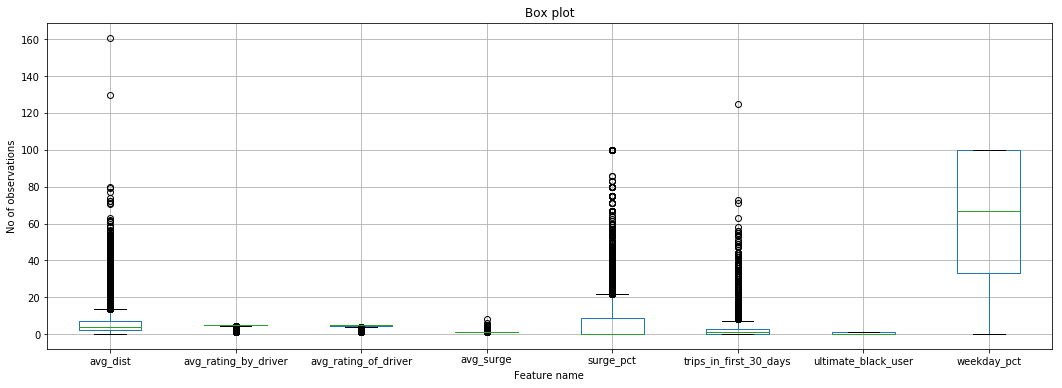

In [21]:
import seaborn as sns
plt.figure(figsize=(18,6))

df.boxplot()
_ = plt.xlabel('Feature name')
_ = plt.ylabel('No of observations')
_ = plt.title('Box plot')
plt.show()

We can see that there are outliers present in all numerical features except for weekday_pct. We will continue by excluding rows that contain features value that is 3 time more or less then standard deviations away from the mean.

In [22]:
# Filter out rows with features that have values more than 3 standard deviations from the mean
df = df[np.abs(df['avg_dist']-df['avg_dist'].mean())<=(3*df['avg_dist'].std())]
df = df[np.abs(df['avg_rating_by_driver']-df['avg_rating_by_driver'].mean())<=(3*df['avg_rating_by_driver'].std())]
df = df[np.abs(df['avg_rating_of_driver']-df['avg_rating_of_driver'].mean())<=(3*df['avg_rating_of_driver'].std())]
df = df[np.abs(df['avg_surge']-df['avg_surge'].mean())<=(3*df['avg_surge'].std())]
df = df[np.abs(df['surge_pct']-df['surge_pct'].mean())<=(3*df['surge_pct'].std())]
df = df[np.abs(df['trips_in_first_30_days']-df['trips_in_first_30_days'].mean())<=(3*df['trips_in_first_30_days'].std())]
df.reset_index(drop=True, inplace=True)

In [23]:
# Lets check the final dataframe now. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 12 columns):
avg_dist                  44666 non-null float64
avg_rating_by_driver      44666 non-null float64
avg_rating_of_driver      44666 non-null float64
avg_surge                 44666 non-null float64
city                      44666 non-null object
last_trip_date            44666 non-null datetime64[ns]
phone                     44666 non-null object
signup_date               44666 non-null datetime64[ns]
surge_pct                 44666 non-null float64
trips_in_first_30_days    44666 non-null int64
ultimate_black_user       44666 non-null bool
weekday_pct               44666 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.8+ MB


Now that we've identified outliers in the data, let's determine if all cateogorical features take appropriate values (i.e. look for typos):

We see that all non-date categorical features take values we would expect and so we do not need to clean these any further. Next, we will explore correlations to determine if there is any redundancy in the data or highly predictive features:

In [24]:
df['retained'] = df['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz=None) else 0)

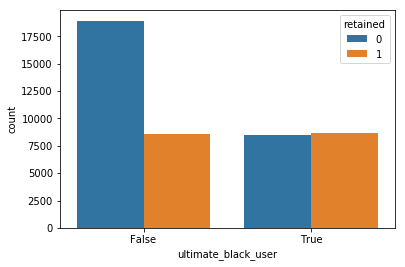

In [25]:
sns.countplot(x='ultimate_black_user', data=df, hue='retained')

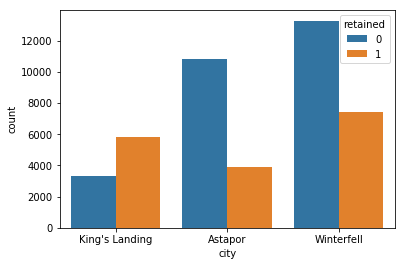

In [26]:
sns.countplot(x='city', data=df, hue='retained')

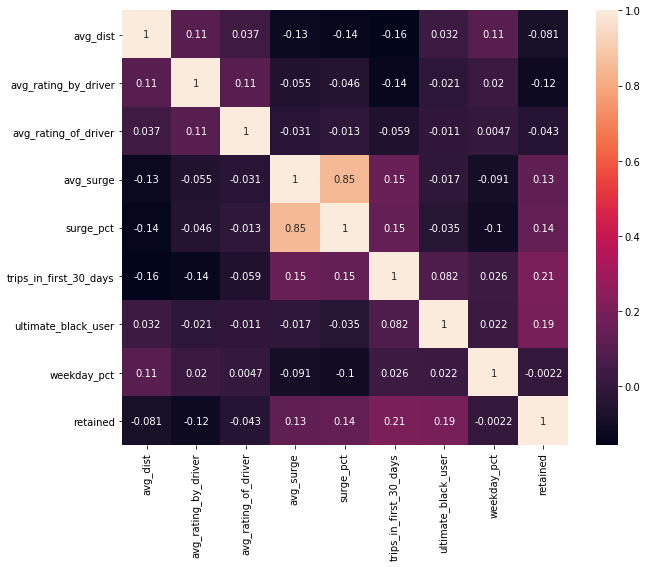

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

* ** we can see the predictor variable "retained" has a high correation with 

'avg_rating_by_driver' 

'avg_surge', 

'surge_pct', 

'trips_in_first_30_days', 

'ultimate_black_user'


In [28]:
# Show the correlation matrix
corr_matrix = df.corr()

# Filter to see if there are any features correlated at above 0.50 or below -0.50
corr_matrix[(abs(corr_matrix) >= 0.50) & (abs(corr_matrix) < 1.0)]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,NaN,0.849852,NaN,NaN,NaN,NaN
surge_pct,NaN,NaN,NaN,0.849852,NaN,NaN,NaN,NaN,NaN
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that surge_pct and avg_surge are highly correlated with eachother at 0.849852, and this makes sense given these two features are highly related (85% in thsi case) to there being a surge or not. Since there are not too many features in this dataset, we will keep these two features.  
  
### Finally, what fraction of observed users were retained?

By definition, retained users made a trip within the last 30 days of this date. Let's see how many users have been retained:

In [29]:
# When was the last trip date in the dataset?
sorted(df['last_trip_date'].unique())[-10:]

[numpy.datetime64('2014-06-22T00:00:00.000000000'),
 numpy.datetime64('2014-06-23T00:00:00.000000000'),
 numpy.datetime64('2014-06-24T00:00:00.000000000'),
 numpy.datetime64('2014-06-25T00:00:00.000000000'),
 numpy.datetime64('2014-06-26T00:00:00.000000000'),
 numpy.datetime64('2014-06-27T00:00:00.000000000'),
 numpy.datetime64('2014-06-28T00:00:00.000000000'),
 numpy.datetime64('2014-06-29T00:00:00.000000000'),
 numpy.datetime64('2014-06-30T00:00:00.000000000'),
 numpy.datetime64('2014-07-01T00:00:00.000000000')]

Based on the last trip date in the dataset of 7/1/2014, it looks like the data was pulled on July 1st, 2014. By definition, retained users made a trip within the last 30 days of this date. Let's see how many users have been retained:

In [30]:
print('{:.2f}% of users have taken a trip on or after June 1st, 2014 and are considered \'retained\'.'\
      .format(len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100))

38.59% of users have taken a trip on or after June 1st, 2014 and are considered 'retained'.


## Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

We begin by creating the target variable for a binary classification of retained or not retained:


The decision tree is a good choice in this scenario due to its interpretability and ease of finding the most predictive features of retention. In addition, the decision tree gives the best baseline accuracy compared to logistic regression, naive bayes, k-nearest-neighbors, random forest, bagged random forest, and bagged random (extra) tree classifiers.

Lets Split this data into train and test sets, and model the data with a decision tree classifier. In addition, the decision tree does not handle data if it is not numerical in nature. We must drop all datetime features and one-hot-encode any categorical features.  

In [31]:
# Drop last_trip_date
df.drop('last_trip_date', axis=1, inplace=True)

In [32]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Drop other datetime features
df.drop('signup_date', axis=1, inplace=True)

In [34]:
# One-hot-encode all categorical features
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])

df_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,1,1,0,1,0


In [35]:
# Split into train and test sets

train, test = train_test_split(df_encoded, test_size=.2, 
                               random_state=42)

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print('Train shape: {}\n Test shape: {}'.format(train.shape, test.shape))

Train shape: (35732, 15)
 Test shape: (8934, 15)


In [36]:
# Perform cross validation on the training set

from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

target = train['retained']
train = train.drop('retained', axis=1)

clf = DecisionTreeClassifier(max_depth=8, min_samples_split=8, max_leaf_nodes=50)

cv = cross_validation.KFold(len(train), n_folds=10)

cv_count = 1
for traincv, testcv in cv:  
        preds = clf.fit(train.loc[list(traincv),:], 
                        target.loc[list(traincv),]).predict(train.loc[list(testcv),:])
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(target.loc[testcv,], preds)

        print('Round {} CV\nAccuracy: {:.2f}\nAUC: {:.4f}\nConfusion Matrix:\n{}\n\n'\
                  .format(cv_count, accuracy_score(target.loc[testcv,], preds)*100, 
                          auc(false_positive_rate, true_positive_rate),
                          confusion_matrix(target.loc[testcv,], preds)))
        cv_count += 1

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Round 1 CV
Accuracy: 76.61
AUC: 0.7434
Confusion Matrix:
[[1844  329]
 [ 507  894]]


Round 2 CV
Accuracy: 77.34
AUC: 0.7470
Confusion Matrix:
[[1897  313]
 [ 497  867]]


Round 3 CV
Accuracy: 76.85
AUC: 0.7447
Confusion Matrix:
[[1870  347]
 [ 480  876]]


Round 4 CV
Accuracy: 77.22
AUC: 0.7472
Confusion Matrix:
[[1892  341]
 [ 473  867]]


Round 5 CV
Accuracy: 77.22
AUC: 0.7512
Confusion Matrix:
[[1849  342]
 [ 472  910]]


Round 6 CV
Accuracy: 76.83
AUC: 0.7450
Confusion Matrix:
[[1860  340]
 [ 488  885]]


Round 7 CV
Accuracy: 77.44
AUC: 0.7555
Confusion Matrix:
[[1829  335]
 [ 471  938]]


Round 8 CV
Accuracy: 75.59
AUC: 0.7300
Confusion Matrix:
[[1847  328]
 [ 544  854]]


Round 9 CV
Accuracy: 76.66
AUC: 0.7445
Confusion Matrix:
[[1841  338]
 [ 496  898]]


Round 10 CV
Accuracy: 77.08
AUC: 0.7345
Confusion Matrix:
[[1968  286]
 [ 533  786]]




In [37]:
# Train the model on the full training data and test on the test set
final_clf = clf.fit(train, target)

test_target = test['retained']
test = test.drop('retained', axis=1)

test_preds = final_clf.predict(test)

print('Test set accuracy: {:.2f}\nConfusion Matrix:\n{}'\
          .format(accuracy_score(test_target, test_preds)*100, 
                  confusion_matrix(test_target, test_preds)))

cv_scores_lr = cross_val_score(clf, test, test_target, cv=10)

# Print the 5-fold cross-validation scores

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores_lr)))

Test set accuracy: 76.95
Confusion Matrix:
[[4605  830]
 [1229 2270]]
Average 10-Fold CV Score: 0.739981296494833


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(verbose=True, n_estimators=200)
classifier.fit(train, target)
classifier.score(test, test_target)

      Iter       Train Loss   Remaining Time 
         1           1.2887            7.00s
         2           1.2533            6.63s
         3           1.2222            6.29s
         4           1.1958            6.37s
         5           1.1736            6.42s
         6           1.1547            6.30s
         7           1.1388            6.27s
         8           1.1188            6.33s
         9           1.1049            6.22s
        10           1.0939            6.17s
        20           1.0095            5.76s
        30           0.9769            5.43s
        40           0.9587            5.03s
        50           0.9482            4.69s
        60           0.9411            4.34s
        70           0.9353            4.07s
        80           0.9311            3.78s
        90           0.9274            3.53s
       100           0.9245            3.18s
       200           0.9019            0.00s


0.7883366912916947

We now have a model that is about 78% accurate and does a reasonable good job of determining the difference between a retained and not retained user as shown by the confusion matrix. In addition, we may have increased accuracy by allowing the tree to grow further, but this reduces interpretability significantly. Looking at the tree, we see we have the most predictive features near the top of the tree. We can quantify how important these features are:

In [39]:
# Find feature importances

feature_importance = pd.DataFrame(final_clf.feature_importances_).T
feature_importance.columns = list(train.columns)
feature_importance

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,0.005162,0.372376,0.0,0.013664,0.157878,0.032421,0.048195,0.012691,0.211794,0.002596,0.087925,0.005614,0.032863,0.016821


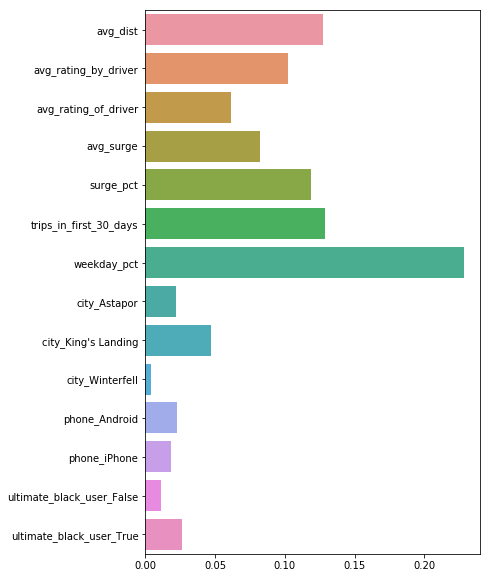

In [40]:
plt.figure(figsize=(6,10))
sns.barplot(y=train.columns, x=classifier.feature_importances_)

The top 3 most predictive features, from first model, are avg_rating_by_driver, city_King's_Landing, and surge_pct. 
  
The top 3 most predictive features, from Second model, are avg_dist, weekday_pct, and trips_in_first_30_days and surge_pct. 


In terms of model validity, Second model is close to valid and accurate. 


### Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

**To improve longterm rider retention, Ultimate might want to focus on improving top predictors of model performance: 

1. <b>avg_rating_by_driver</b>: This indicates that riders with less that or equal to rating 4.95 tend to retain more. This is probabily because riders with an extremely high rating do not ride very often and, in turn, do not get rated very often.  
2. <b>city_King's_Landing</b>: This indicates that riders not from King's Landing tend to be retained more. It is possible that something is happening in this city with drivers or users that is not properly incentivizing retention. Alternatively, discover what is unique about King's Landing drivers and passengers and check if it can be implemented in the other cities, especially Astapor.
 
3. <b>surge_pct</b>: This indicates that users that take less than or equal to 25% of their trips with a surge multipler greater than 1 tend to be retained more. This could signify that surges are too high and could use a reduction to increase user retention.

4. If the user has taken a **Ultimate Black**, it indicates that s/he is more likely to stay. Provide addtional perks to these people.

5.  People who use cabs on the weekdays are more likely to be retained. This is the most important feature as discovered by our Gradient Boosting Classifier. Provide more offers in the weekdays to encourage people to take cabs to work.